# Reuters Dataset

*   This is a toy dataset for text classification problem.
*    Basically reduces to multi-class classification problem after converting the words to integers.

In [1]:
!pip install numpy==1.16.1

In [0]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [0]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [5]:
train_labels[0]

3

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
x_train.shape

(8982, 10000)

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# Splitting the data into two halves for traning and validation.
x_val = x_train[:1000]
x_partial_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
y_partial_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(x_partial_train, y_partial_train, epochs = 7, batch_size = 64, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 140us/step - loss: 0.2279 - acc: 0.9510 - val_loss: 1.0514 - val_acc: 0.8000
Epoch 2/7
7982/7982 [==============================] - 1s 104us/step - loss: 0.1667 - acc: 0.9555 - val_loss: 1.0149 - val_acc: 0.8050
Epoch 3/7
7982/7982 [==============================] - 1s 97us/step - loss: 0.1493 - acc: 0.9546 - val_loss: 1.0188 - val_acc: 0.8060
Epoch 4/7
7982/7982 [==============================] - 1s 100us/step - loss: 0.1325 - acc: 0.9577 - val_loss: 1.0842 - val_acc: 0.7930
Epoch 5/7
7982/7982 [==============================] - 1s 98us/step - loss: 0.1304 - acc: 0.9562 - val_loss: 1.0347 - val_acc: 0.8030
Epoch 6/7
7982/7982 [==============================] - 1s 98us/step - loss: 0.1186 - acc: 0.9562 - val_loss: 1.0686 - val_acc: 0.8050
Epoch 7/7
7982/7982 [==============================] - 1s 99us/step - loss: 0.1085 - acc: 0.9570 - val_loss: 1.1213 - val_acc: 0.7990


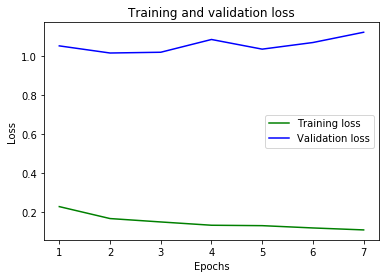

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

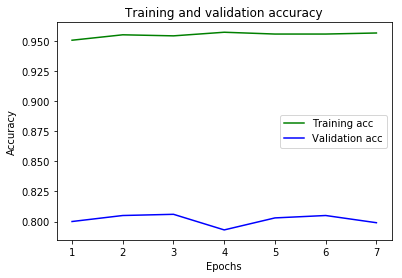

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
predictions = model.predict(x_test)

In [0]:
l = np.argmax(predictions, axis = 1)    

In [30]:
print(len(one_hot_test_labels))
print(len(l))

2246
2246


In [35]:
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 95us/step


In [36]:
print(test_loss)
print(test_acc)

1.2850560738588166
0.788512911843277
